# cdFBA Vivarium 2.0 Demo

This notebook will introduce the Community Dynamic Flux Balance Analysis (cdFBA) modules built using the Vivarium 2.0 interface platform. Individual model processes are connected using the `bigraph-schema` and `process-bigraph`

In [3]:
from cdFBA.processes.dfba import *
import pprint

from cdFBA import positive_float, set_float, bounds_type, particle_type, volumetric_type, chemostat_type
from cdFBA.processes.dfba import DFBA, UpdateEnvironment, Chemostat, Injector, WaveFunction
from cdFBA.utils import DFBAconfig, model_from_file, get_objective_reaction, get_injector_spec, get_wave_spec, \
    get_chemo_spec, dfba_config
from cdFBA.utils import dfba_config_from_model, get_single_dfba_spec, dfba_config, environment_spec, initial_environment, get_initial_counts
import cobra

from process_bigraph.composite import ProcessTypes
from process_bigraph import Composite

from cdFBA import register_types

from matplotlib import pyplot as plt

from vivarium import Vivarium
from vivarium.tests import DEMO_PROCESSES

In [4]:
processes = {
    'DFBA': DFBA,
    'Chemostat': Chemostat,
    'Injector': Injector,
    'WaveFunction': WaveFunction,
    'UpdateEnvironment': UpdateEnvironment,
}

types={
    'positive_float': positive_float,
    'set_float': set_float,
    'bounds': bounds_type,
    'particle': particle_type,
    'volumetric': volumetric_type,
}

In [5]:
v = Vivarium(processes=processes)

In [6]:
v.print_processes()

['WaveFunction', 'console-emitter', 'composite', 'UpdateEnvironment', 'DFBA', 'ram-emitter', 'Chemostat', 'Injector']


In [7]:
v.register_types(
    types={
        'positive_float': positive_float,
        'set_float': set_float,
        'bounds': bounds_type,
        'particle': particle_type,
        'volumetric': volumetric_type,
    }
)

In [15]:
name1 = "Escherichia coli K12"
model_file_1 = "iAF1260"
medium_type='minimal'
model_1 = model_from_file(model_file=model_file_1)
media_1 = DFBAconfig(model=model_1, medium_type=medium_type)
initial_counts = get_initial_counts(model=model_1, biomass=0.1, medium_type=medium_type, name=name1)
initial_env = initial_environment(volume=1.0, initial_counts= initial_counts)
config_1 = dfba_config(
    model_file = model_file_1,
    name = name1,
    kinetics = media_1.kinetics,
    reaction_map = media_1.reaction_map,
    biomass_identifier = media_1.biomass_indentifier,
    bounds = None,
)

In [16]:
v.add_process(
    name=name1,
    process_id="DFBA",
    config=config_1,
)

In [17]:
v.connect_process(
    process_name=name1,
    inputs={
            "shared_environment": ["shared environment"],
            "current_update": ["dFBA Results"]
        },
    outputs={
            "dfba_update": ["dFBA Results", name1]
        }
)

In [18]:
v.add_process(
    name='UpdateEnvironment',
    process_id='UpdateEnvironment',
    config={}
)

In [19]:
v.connect_process(
    process_name='UpdateEnvironment',
    inputs={
            "species_updates": ["dFBA Results"],
            "shared_environment": ["shared environment"]
    },
    outputs={
            "shared_environment": ["shared environment"],
    }
)

Writing out/diagram


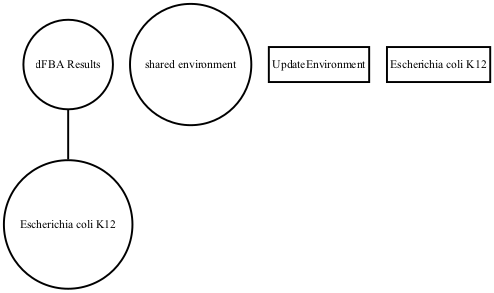

In [20]:
v.diagram()

In [21]:
v.set_value(path=['shared environment', 'volume'], value=initial_env['volume'])
v.set_value(path=['shared environment', 'counts'], value=initial_env['counts'])
v.set_value(path=['shared environment', 'concentrations'], value=initial_env['concentrations'])

In [22]:
v.add_emitter()

In [23]:
v.diagram()

AttributeError: 'NoneType' object has no attribute 'get'

In [24]:
v.run(interval=100)

KeyError: 'instance'

In [25]:
name2 = "Listeria monocytogenes"
model_file_2 = "/Users/tasnifrahman/Research/ecolicommunity/agora2/Listeria_monocytogenes_SLCC_2378.xml"
model_2 = model_from_file(model_file=model_file_2)
media_2 = DFBAconfig(model=model_2, medium_type='minimal')
initial_counts = initial_conditions(model=model_2, biomass=0.2, medium_type='default', name=name2)
initial_env = initial_environment(volume=2.0, initial_counts= initial_counts)
config_2 = dfba_config(
    model_file = model_file_2,
    name = name2,
    kinetics = media_2.kinetics,
    reaction_map = media_2.reaction_map,
    biomass_identifier = media_2.biomass_indentifier,
    bounds = None,
)

NameError: name 'initial_conditions' is not defined

In [26]:
model_1.metabolites[50]

Metabolite identifier,12dgr161_p
Name,"1,2-Diacyl-sn-glycerol (dihexadec-9-enoyl,..."
Memory address,0x31c2739d0
Formula,C35H64O5
Compartment,p
In 3 reaction(s),"PETNT161pp, 12DGR161tipp, PAPA161pp"


In [27]:
v

Vivarium( 
{ 'Escherichia coli K12': { 'address': 'local:DFBA',
                            'config': { 'biomass_identifier': 'BIOMASS_Ec_iAF1260_core_59p81M',
                                        'bounds': { 'ATPM': { 'lower': 1,
                                                              'upper': 1},
                                                    'EX_o2_e': { 'lower': -2,
                                                                 'upper': {}}},
                                        'interval': 0.1,
                                        'kinetics': { 'Ammonia': (0.5, 2.0),
                                                      'Calcium': (0.5, 2.0),
                                                      'Chloride': (0.5, 2.0),
                                                      'Co2+': (0.5, 2.0),
                                                      'Cu2+': (0.5, 2.0),
                                                      'D-Glucose': (0.5, 2.0),
                 

In [1]:
len({})

0